# For QuantLib Starter

오늘 우리의 목적은 QuantLib을 이용하여 옵션 전략 그래프를 구현해보는 것이며  
대부분 QuantLib을 처음 다룬다고 가정하여 코드 실행 위주로 다룰 것임  

In [43]:
#!pip install QuantLib

#QuantLib이 설치되어 있지 않다면 "#"를 지우고 QuantLib을 설치

In [1]:
import QuantLib as ql

# 목차

1. 시간


> 1.1. Date  
> 1.1.1. Period  
> 1.2. Calendar  
> 1.3. Schedule  
> 1.4. DayCounter  
> 1.5. Interest Rate
  
2. 옵션 그릭스 구하기
  




# 1. 시간
## 1.1 Date Class

In [45]:
#특정 날짜의 선언

Day = 1
Month = 9
Year = 2022
serialNumber = 44805

date = ql.Date(Day, Month, Year)
date1 = ql.Date(serialNumber)

#일-월-년 순서임에 주의
print(date)
print(date1)

September 1st, 2022
September 1st, 2022


In [46]:
print(type(date))

<class 'QuantLib.QuantLib.Date'>


In [47]:
#기능

day = date.dayOfMonth() #date은 해당 달의 몇 번째 날이야?(며칠이야?)
day2 = date.dayOfYear() #date은 해당 년도의 며칠이야?
month = date.month() #date의 월 추출
year = date.year() #date의 년도 추출
sn = date.serialNumber() #1900-01-01부터의 일련번호 추출
weekday = date.weekday()  #요일 추출(1: 일요일 ~ 7: 토요일)

#이 외에도 다양한 기능이 있음!

print(f'9월 1일은 {month}월의 {day}번째 날이며 {year}년의 {day2}번째 날이고, 1900년 1월 1일로부터 {sn}번째 날인 {weekday}번째 요일이다.')

9월 1일은 9월의 1번째 날이며 2022년의 244번째 날이고, 1900년 1월 1일로부터 44805번째 날인 5번째 요일이다.


## 1.1.1. Period Class 
   
2022-09-01(Date)과 2022-10-01(Date)의 사이는?  
1개월!(Period)

In [53]:
#1개월을 정의하고 싶다면?

#방법1
a_month = ql.Period(1, ql.Months)
#ql.Period(한, 달)

#일 = ql.Days
#주 = ql.Weeks
#달 = ql.Months
#년 = ql.Years

print(a_month)

1M


In [54]:
#방법2

ql.Period(ql.Monthly)
#그 외에도 ql 뒤에 Annual, Semiannual, Quarterly, Monthly, Biweekly, Weekly, Daily, Once가 올 수 있음

Period("1M")

In [55]:
date = ql.Date(1, 9, 2022)

#날짜 쪼개기
print(date.dayOfMonth(),
date.month(),
date.year())

#날짜 비교하기
print(date.weekday() == ql.Thursday)

#날짜 계산하기
print(format(date + 1))  # add a day
print(format(date + ql.Period(1, ql.Months)))

1 9 2022
True
September 2nd, 2022
October 1st, 2022


In [7]:
#사후퀴즈1
kr = ql.SouthKorea()
Day = 4
Month = 10
Year = 2022
date = ql.Date(Day, Month, Year)
serialNumber = 999
print(format(date + 21))

October 25th, 2022


In [13]:
#사후퀴즈2
cal = ql.TARGET()
Day = 9
Month = 10
Year = 2022
date = ql.Date(Day, Month, Year)
print('휴일인가? :', cal.isHoliday(date))
cal.removeHoliday(date)
print('휴일인가? :', cal.isHoliday(date))


휴일인가? : True
휴일인가? : False


## 1.2. Calendar

금융시장 역시 휴일에는 쉬기 때문에 영업일 및 휴일 처리 필요!

In [7]:
#각 나라의 달력 불러오기

us = ql.UnitedStates()
eu = ql.TARGET()
kr = ql.SouthKorea()

#당연하지만 이 외에도 정말 많은 나라가 있음.. 영국, 일본, 중국 등은 물론이고 추천에서 남아프리카도 목격함

In [58]:
#달력의 기능

cal = ql.SouthKorea()
date = ql.Date(1, 9, 2022)

print('Is BD :', cal.isBusinessDay(date)) #영업일인가?
print('Is Holiday :', cal.isHoliday(date))  #휴일인가?
print('Is Weekend :', cal.isWeekend(ql.Thursday)) #주말인가?
print('Is Last BD :', cal.isEndOfMonth(ql.Date(1, 9, 2022))) #달의 마지막 영업일인가?
print('Last BD :', cal.endOfMonth(date))  #이 날짜가 속한 달의 마지막 영업일은?

Is BD : True
Is Holiday : False
Is Weekend : False
Is Last BD : False
Last BD : September 30th, 2022


In [59]:
#휴일과 영업일을 조정할 수 있을까?

kr = ql.SouthKorea()

day1 = ql.Date(1, 9, 2022) #학교 가신거 기억나죠?
day2 = ql.Date(1, 10, 2022) #주말이었음(토요일)

print('Is day1 Business Day : ', cal.isBusinessDay(day1))
print('Is day2 Business Day : ', cal.isBusinessDay(day2))

Is day1 Business Day :  True
Is day2 Business Day :  False


In [60]:
cal.addHoliday(day1)
cal.removeHoliday(day2)

In [61]:
print('Is day1 Business Day : ', cal.isBusinessDay(day1))
print('Is day2 Business Day : ', cal.isBusinessDay(day2))

Is day1 Business Day :  False
Is day2 Business Day :  True


In [67]:
cal.addHoliday(day2)
cal.removeHoliday(day1)

**Convention**  
영업일 관행. 만기일과 휴일이 겹칠 때 실제 만기일을 어떻게 해야 할지

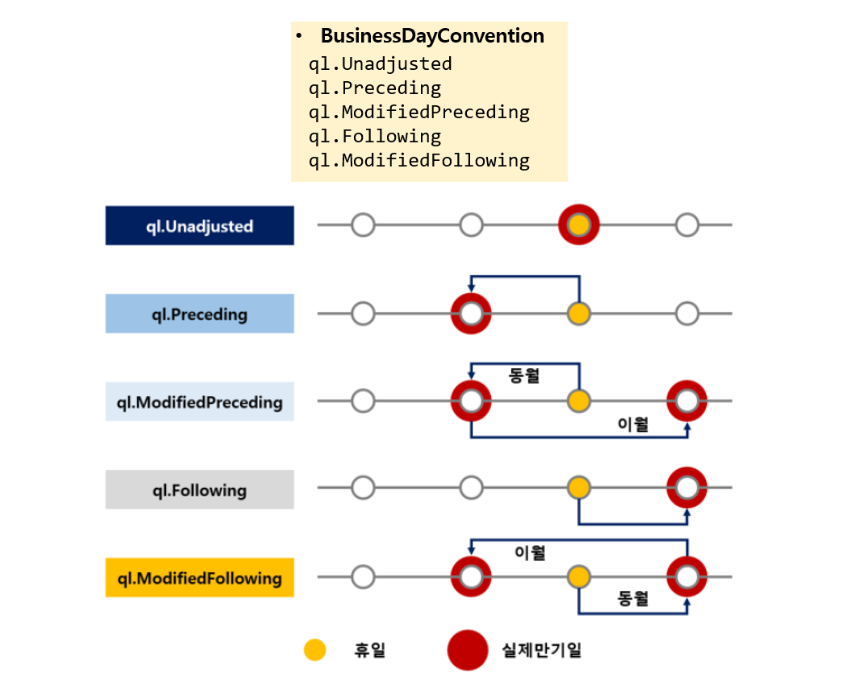

In [68]:
#만기일이 휴일이면 어떡하지..?

cal = ql.SouthKorea()

firstDate = ql.Date(30, 9, 2022)
secondDate = ql.Date(1, 10, 2022)

print('Date 2 Adj :', cal.adjust(secondDate, ql.Preceding)) #휴일 전날
print('Date 2 Adj :', cal.adjust(secondDate, ql.ModifiedPreceding)) #같은 달이면 휴일 전날, 다른 달이면 다음날

Date 2 Adj : September 30th, 2022
Date 2 Adj : October 4th, 2022


In [70]:
month = ql.Period(1, ql.Months)

print('Date 1 Month Adv :',
    cal.advance(firstDate, month)) #달력 안에서도 날짜 계산

#날짜 간의 영업일 계산
print('Business Days Between :',
    cal.businessDaysBetween(
        ql.Date(1, 9, 2018), ql.Date(1, 10, 2018),
        True, True)) 
#뒤의 두 True는 각각 includeFirst, includeLast

Date 1 Month Adv : October 31st, 2022
Business Days Between : 18


In [71]:
#두 국가의 달력 합치기
joint_calendar = ql.JointCalendar(ql.SouthKorea(), ql.UnitedStates())

## 1.3. Schedule

In [72]:
#Schedule(effectiveDate, terminationDate, tenor, calendar, convention, terminationDateConvention, rule, endOfMonth, firstDate=Date(), nextToLastDate=Date())
#주어진 기간, 휴일 법칙, 이자일 계산 방식에 대한 이자기간 계산
effectiveDate = ql.Date(1,9,2022) #시작일
terminationDate = ql.Date(1,9,2024) #만기일
frequency = ql.Period('6M')
calendar = ql.SouthKorea()
convention = ql.ModifiedFollowing #만기일 외의 휴일 이자지급일 처리 방식
terminationDateConvention = ql.ModifiedFollowing  #만기일이 휴일일 때
rule = ql.DateGeneration.Backward #만기일부터 이자지급일까지 후진 방식으로
endOfMonth = False #말일 지급

schedule = ql.Schedule(effectiveDate, terminationDate, frequency, calendar, 
                       convention, terminationDateConvention, rule, endOfMonth)

for index, item in enumerate(schedule):
    print(index + 1, item)

1 September 1st, 2022
2 March 2nd, 2023
3 September 1st, 2023
4 March 4th, 2024
5 September 2nd, 2024


## 1.4. DayCount

금융상품의 날짜를 세는 방법은 매우 다양하다.  
더 궁금한 사람이 있다면 다음의 pdf를 참고하자!  
https://www.isda.org/a/pIJEE/The-Actual-Actual-Day-Count-Fraction-1999.pdf  

In [75]:
#다양한 daycounter들을 딕셔너리로 만듦
dayCounters = {
    'SimpleDayCounter': ql.SimpleDayCounter(),
    'Thirty360': ql.Thirty360(),
    'Actual360': ql.Actual360(),
    'Actual365Fixed': ql.Actual365Fixed(),
    'Actual365Fixed(Canadian)': ql.Actual365Fixed(ql.Actual365Fixed.Canadian),
    'Actual365FixedNoLeap': ql.Actual365Fixed(ql.Actual365Fixed.NoLeap),
    'ActualActual': ql.ActualActual(),
    'Business252': ql.Business252()
}

#고정금리 채권의 가격
#ql.FixedRateCoupon(paymentDate, nominal, rate, dayCounter, startDate, endDate)

startDate = ql.Date(1,9,2022)
endDate = ql.Date(1,3,2023)
r = 0.05
nominal = 100e6 #명목 원금

for name, dc in dayCounters.items():
    amount = ql.FixedRateCoupon(endDate, nominal, r, dc, startDate, endDate).amount()
    print(name, f"{amount:,.2f}")

SimpleDayCounter 2,500,000.00
Thirty360 2,500,000.00
Actual360 2,513,888.89
Actual365Fixed 2,479,452.05
Actual365Fixed(Canadian) 2,479,452.05
Actual365FixedNoLeap 2,479,452.05
ActualActual 2,479,452.05
Business252 2,440,476.19


## 1.5. Interest Rate  

모든 금융상품의 payoff를 가장 기본적으로 표현하면 시간과 이자율로 표현 가능

In [77]:
#ql.InterestRate(rate, dayCount, compounding frequency)
rate = ql.InterestRate(0.05, ql.Actual360(), ql.Compounded, ql.Annual)

print(rate)

5.000000 % Actual/360 Annual compounding


**Compounding** Speed Wagon


*   단리: ql.Simple
*   복리: ql.Coumpounded
*   연속복리: ql.Continuous
*   ~차기 이표일-단리 / 이후-복리: ql.SimpleThenCompounded
*   위와 반대: ql.CompoundedThenSimple







# 2. 옵션 가격 & 그릭스 구하기
준비물: 평가일, 해당 국가의 달력, 영업일수 계산 방식

In [78]:
valuation = ql.Date(1, 9, 2022) 
ql.Settings.instance().evaluationDate = valuation #가치평가일 설정
calendar = ql.SouthKorea()
daycount = ql.ActualActual()

**블랙-숄즈** 방정식  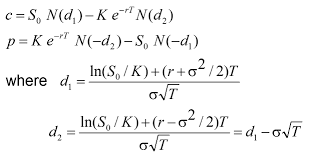  
필요한 데이터: 기초자산 가격, 배당률, 무위험금리, 변동성

In [91]:
#시장의 간단한 데이터를 담는 그릇

price = ql.SimpleQuote(250.0) #기초상품 가격
div = ql.SimpleQuote(0.0) #배당률
rf = ql.SimpleQuote(0.01) #무위험이자율
volatility = ql.SimpleQuote(0.1) #시장의 변동성

In [92]:
#값 변화에 대비
#QuoteHandle은 값이 아닌 메모리 위치를 기억하기 때문에 값이 바뀌어도 대응 가능

p = ql.QuoteHandle(price)
d = ql.QuoteHandle(div)
r = ql.QuoteHandle(rf)
v = ql.QuoteHandle(volatility)

In [93]:
#Term-Structure 객체로의 변환
#시점의 값 -> 기간의 값

r_ = ql.FlatForward(valuation, r, daycount)
d_ = ql.FlatForward(valuation, d, daycount)
v_ = ql.BlackConstantVol(valuation, calendar, v, daycount)

In [94]:
#TS의 값 변화에 대비

r__ = ql.YieldTermStructureHandle(r_)
d__ = ql.YieldTermStructureHandle(d_)
v__ = ql.BlackVolTermStructureHandle(v_)

**Pricing Engine 정하기**  
https://quantlib-python-docs.readthedocs.io/en/latest/stochastic_processes.html  
공식 사전에 다양한 가격 책정 방식이 있음!

In [95]:
process = ql.BlackScholesMertonProcess(p, d__, r__, v__)
engine = ql.AnalyticEuropeanEngine(process) #제일 무난한 유러피안 옵션으로!

In [96]:
#평가 엔진을 만들었으니 이제 엔진에 적용할 옵션 만들기

maturity_date = ql.Date(1, 9, 2023) #만기일
strike_price = 250  #행사가
option_type = ql.Option.Call  #무슨 옵션?
exercise = ql.EuropeanExercise(maturity_date)
payoff = ql.PlainVanillaPayoff(option_type, strike_price)

#완성된 옵션
option = ql.VanillaOption(payoff, exercise)

In [97]:
#Pricing

option.setPricingEngine(engine)
print(option.NPV())
print(option.delta())
print(option.gamma())
print(option.vega())
print(option.theta())
print(option.rho())

11.213091022555219
0.5596176923702431
0.015779173236315547
98.61983272697222
-6.217904957048651
128.6913320700054


In [89]:
#(바꾸고자 하는 변수).setValue로 다른 상품/시장/만기일 설정 가능

# price.setValue(100)
# div.setValue(0.01)
# rf.setValue(0.00)
# volatility.setValue(0.05)

# print(option.NPV())
# print(option.delta())
# print(option.gamma())
# print(option.vega())
# print(option.theta())
# print(option.rho())

2.6979663269895867e-77
1.00676487699234e-76
3.736014855448088e-76
1.8680074277242005e-73
-4.569342081610876e-75
1.0040669106653378e-74


## 2.1. 그릭스 그래프 그리기

In [98]:
import numpy as np
import matplotlib.pyplot as plt

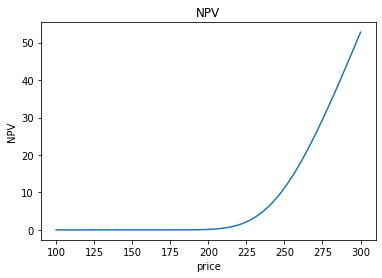

In [100]:
npv = []

for s in np.linspace(100,300, 500):
  price.setValue(s)
  npv.append(option.NPV())

plt.plot(np.linspace(100,300, 500), npv)
plt.title("NPV")
plt.xlabel('price')
plt.ylabel('NPV')
plt.show()

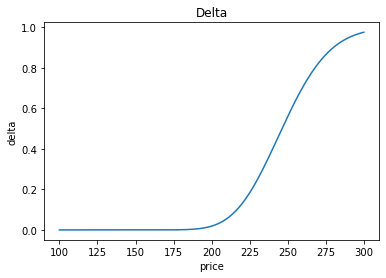

In [104]:
delta = []

for s in np.linspace(100,300, 500):
  price.setValue(s)
  delta.append(option.delta())

plt.plot(np.linspace(100,300, 500), delta)
plt.title("Delta")
plt.xlabel('price')
plt.ylabel('delta')
plt.show()

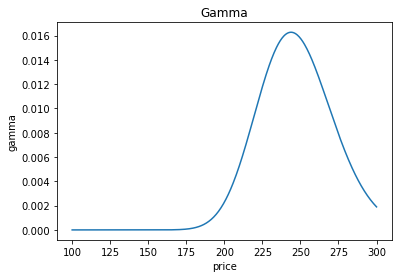

In [105]:
gamma = []

for s in np.linspace(100,300, 500):
  price.setValue(s)
  gamma.append(option.gamma())

plt.plot(np.linspace(100,300, 500), gamma)
plt.title("Gamma")
plt.xlabel('price')
plt.ylabel('gamma')
plt.show()

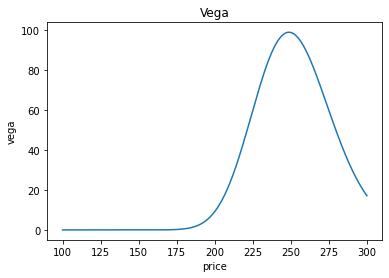

In [106]:
vega = []

for s in np.linspace(100,300, 500):
  price.setValue(s)
  vega.append(option.vega())

plt.plot(np.linspace(100,300, 500), vega)
plt.title("Vega")
plt.xlabel('price')
plt.ylabel('vega')
plt.show()

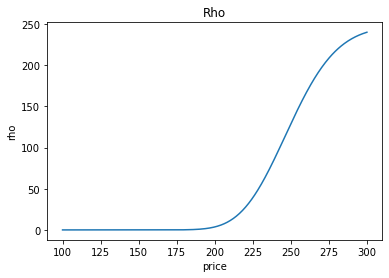

In [107]:
rho = []

for s in np.linspace(100,300, 500):
  price.setValue(s)
  rho.append(option.rho())

plt.plot(np.linspace(100,300, 500), rho)
plt.title("Rho")
plt.xlabel('price')
plt.ylabel('rho')
plt.show()

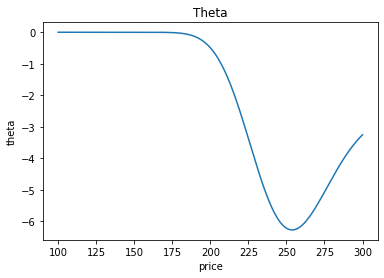

In [108]:
theta = []

for s in np.linspace(100,300, 500):
  price.setValue(s)
  theta.append(option.theta())

plt.plot(np.linspace(100,300, 500), theta)
plt.title("Theta")
plt.xlabel('price')
plt.ylabel('theta')
plt.show()

## 2.2. 옵션 전략 구현
스트래들 매수 전략 구현  
행사가가 같은 콜옵션, 풋옵션 1개씩 매수

In [32]:
!pip install IPython
from IPython.display import Image

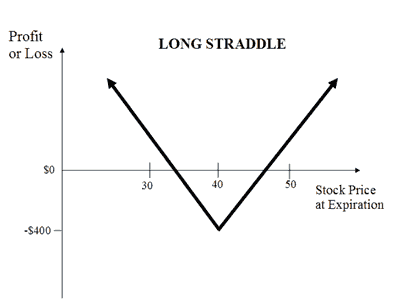

In [33]:
Image("long-straddle.gif")

In [109]:
valuation = ql.Date(1, 9, 2022)
ql.Settings.instance().evaluationDate = valuation
calendar = ql.SouthKorea()
daycount = ql.ActualActual()

price = ql.SimpleQuote(250.0) 
div = ql.SimpleQuote(0.0)
rf = ql.SimpleQuote(0.01)
volatility = ql.SimpleQuote(0.1)

p = ql.QuoteHandle(price)
d = ql.QuoteHandle(div)
r = ql.QuoteHandle(rf)
v = ql.QuoteHandle(volatility)

r_ = ql.FlatForward(valuation, r, daycount)
d_ = ql.FlatForward(valuation, d, daycount)
v_ = ql.BlackConstantVol(valuation, calendar, v, daycount)

r__ = ql.YieldTermStructureHandle(r_)
d__ = ql.YieldTermStructureHandle(d_)
v__ = ql.BlackVolTermStructureHandle(v_)

process = ql.BlackScholesMertonProcess(p, d__, r__, v__)
engine = ql.AnalyticEuropeanEngine(process)

maturity_date = ql.Date(1, 9, 2023)
strike_price = 250

In [110]:
call = ql.EuropeanOption(ql.PlainVanillaPayoff(ql.Option.Call, strike_price),
                         ql.EuropeanExercise(maturity_date))
put = ql.EuropeanOption(ql.PlainVanillaPayoff(ql.Option.Put, strike_price),
                         ql.EuropeanExercise(maturity_date))

In [111]:
call.setPricingEngine(engine)
put.setPricingEngine(engine)

print(call.NPV())
print(put.NPV())

11.213091022555219
8.725549459847223


옵션전략의 payoff는 각 구간의 옵션 그래프의 합

Text(0.5, 1.0, 'NPV')

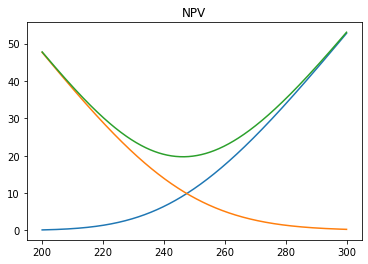

In [112]:
fig, ax = plt.subplots()

pr = np.linspace(200.0,300.0, 500)
call_ = []
put_ = []
strategy = []

for s in np.linspace(200.0,300.0, 500):
  price.setValue(s)
  call_.append(call.NPV())
  put_.append(put.NPV())
  strategy.append(call.NPV()+put.NPV())

plt.plot(pr, call_)
plt.plot(pr, put_)
plt.plot(pr, strategy)
plt.title("NPV")

Text(0.5, 1.0, 'Delta')

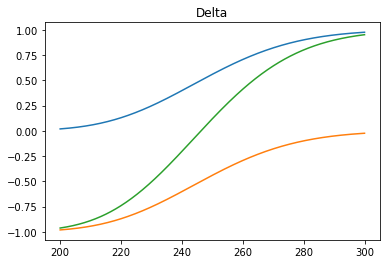

In [113]:
fig, ax = plt.subplots()

pr = np.linspace(200.0,300.0, 500)
call_ = []
put_ = []
strategy = []

for s in np.linspace(200.0,300.0, 500):
  price.setValue(s)
  call_.append(call.delta())
  put_.append(put.delta())
  strategy.append(call.delta()+put.delta())

plt.plot(pr, call_)
plt.plot(pr, put_)
plt.plot(pr, strategy)
plt.title("Delta")

Text(0.5, 1.0, 'Gamma')

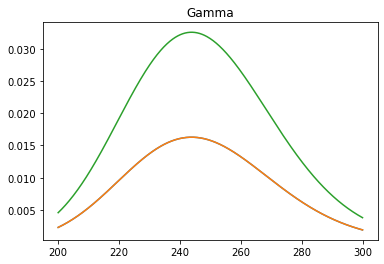

In [115]:
fig, ax = plt.subplots()

pr = np.linspace(200.0,300.0, 500)
call_ = []
put_ = []
strategy = []

for s in np.linspace(200.0,300.0, 500):
  price.setValue(s)
  call_.append(call.gamma())
  put_.append(put.gamma())
  strategy.append(call.gamma()+put.gamma())

plt.plot(pr, call_)
plt.plot(pr, put_)
plt.plot(pr, strategy)
plt.title("Gamma")

Text(0.5, 1.0, 'Vega')

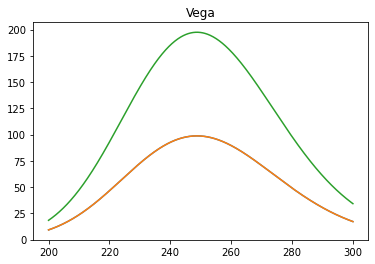

In [116]:
fig, ax = plt.subplots()

pr = np.linspace(200.0,300.0, 500)
call_ = []
put_ = []
strategy = []

for s in np.linspace(200.0,300.0, 500):
  price.setValue(s)
  call_.append(call.vega())
  put_.append(put.vega())
  strategy.append(call.vega()+put.vega())

plt.plot(pr, call_)
plt.plot(pr, put_)
plt.plot(pr, strategy)
plt.title("Vega")

Text(0.5, 1.0, 'Rho')

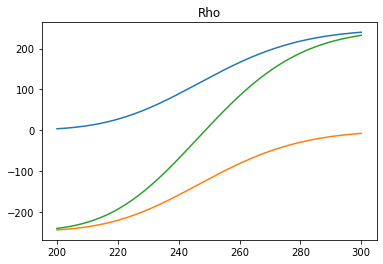

In [117]:
fig, ax = plt.subplots()

pr = np.linspace(200.0,300.0, 500)
call_ = []
put_ = []
strategy = []

for s in np.linspace(200.0,300.0, 500):
  price.setValue(s)
  call_.append(call.rho())
  put_.append(put.rho())
  strategy.append(call.rho()+put.rho())

plt.plot(pr, call_)
plt.plot(pr, put_)
plt.plot(pr, strategy)
plt.title("Rho")

Text(0.5, 1.0, 'Theta')

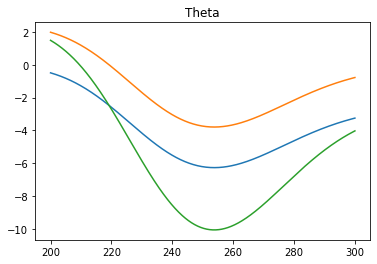

In [118]:
fig, ax = plt.subplots()

pr = np.linspace(200.0,300.0, 500)
call_ = []
put_ = []
strategy = []

for s in np.linspace(200.0,300.0, 500):
  price.setValue(s)
  call_.append(call.theta())
  put_.append(put.theta())
  strategy.append(call.theta()+put.theta())

plt.plot(pr, call_)
plt.plot(pr, put_)
plt.plot(pr, strategy)
plt.title("Theta")

참고문헌

수학과 금융사회 강의 자료  
https://www.theoptionsguide.com/  
"퀀트대디"님 네이버 블로그  
QuantLib 공식 사이트 https://quantlib-python-docs.readthedocs.io/en/latest/  
http://gouthamanbalaraman.com/blog/quantlib-python-tutorials-with-examples.html  
https://clinthoward.github.io/portfolio/2017/04/16/BlackScholesGreeks/  
31기 권나연, 옵션 심화